In [31]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from shapely.geometry import *
import warnings

In [400]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 10)
pd.options.display.max_columns = 999

In [357]:
# read file
# 서울특별시 전체 토지데이터 (11_D002_20210703)
# 서울특별시 전체 건물데이터 (11_D010_20210703)

seoul_land = gpd.read_file('C:/Users/ilove/Desktop/CD_Value_of_Space/AL_11_D002_20210703/AL_11_D002_20210703.shp', encoding='ms949')
seoul_building = gpd.read_file('C:/Users/ilove/Desktop/CD_Value_of_Space/AL_11_D010_20210703/AL_11_D010_20210703.shp', encoding='ms949')

In [358]:
# 엑셀 파일 import 시 error message 발생으로 warnings 추가
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    daechi_data = pd.read_excel('C:/Users/ilove/Desktop/CD_Value_of_Space/pyojebu_daechi.xlsx',
                                sheet_name='표제부 조회',
                                header = 4,
                                # PNU  작성을 위해 column type : str 설정
                               dtype= {'시군구코드':str, '법정동코드':str, '대지구분코드':str, '번':str, '지':str})
daechi_data.head(3)

,순번,대지위치,시군구코드,법정동코드,대지구분코드,번,지,관리건축물대장PK,대장구분코드,대장구분코드명,대장종류코드,대장종류코드명,도로명대지위치,건물명,특수지명,블록,로트,외필지수,새주소도로코드,새주소법정동코드,새주소지상지하코드,새주소본번,새주소부번,동명칭,주부속구분코드,주부속구분코드명,대지면적(㎡),건축면적(㎡),건폐율(%),연면적(㎡),용적률산정연면적(㎡),용적률(%),구조코드,구조코드명,기타구조,주용도코드,주용도코드명,기타용도,지붕코드,지붕코드명,기타지붕,세대수(세대),가구수(가구),높이(m),지상층수,지하층수,승용승강기수,비상용승강기수,부속건축물수,부속건축물면적(㎡),총동연면적(㎡),옥내기계식대수(대),옥내기계식면적(㎡),옥외기계식대수(대),옥외기계식면적(㎡),옥내자주식대수(대),옥내자주식면적(㎡),옥외자주식대수(대),옥외자주식면적(㎡),허가일,착공일,사용승인일,허가번호년,허가번호기관코드,허가번호기관코드명,허가번호구분코드,허가번호구분코드명,호수(호),에너지효율등급,에너지절감율,EPI점수,친환경건축물등급,친환경건축물인증점수,지능형건축물등급,지능형건축물인증점수,생성일자,내진설계적용여부,내진능력
0,1.0,서울특별시 강남구 대치동 1000-10번지,11680,10600,0,1000,0010,11680-100257592,1,일반,2,일반건축물,서울특별시 강남구 테헤란로104길 31,다온 빌딩,NaN,NaN,NaN,0,1.168042e+11,10601.0,0,31.0,NaN,주건축물제1동,0,주건축물,187.7,104.20,55.51,482.92,369.88,197.06,21,철근콘크리트구조,철근콘크리트구조,4000,제2종근린생활시설,제2종근린생활시설,10.0,(철근)콘크리트,평스라브,0,0,11.70,4,1,1,0,0,0.0,482.92,0,0.0,0,0.0,0,0.0,4,0.0,20151209.0,20160216.0,20160805.0,2015.0,3220175.0,건축과,1101.0,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,1.0,NaN
1,2.0,서울특별시 강남구 대치동 1000-12번지,11680,10600,0,1000,0012,11680-16423,1,일반,2,일반건축물,서울특별시 강남구 테헤란로104길 21,세아아인스,NaN,NaN,NaN,0,1.168042e+11,10601.0,0,21.0,NaN,NaN,0,주건축물,2097.4,1208.34,57.61,13955.67,7890.91,376.22,42,철골철근콘크리트구조,철골철근콘크리트조,10000,교육연구시설,업무시설 교육연구및복지시설,10.0,(철근)콘크리트,평슬라브,0,0,36.85,9,4,3,0,0,0.0,13955.67,21,0.0,0,0.0,47,0.0,0,0.0,19951226.0,19960207.0,20010901.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,1.0,NaN
2,3.0,서울특별시 강남구 대치동 1000-1번지,11680,10600,0,1000,0001,11680-4257,1,일반,2,일반건축물,서울특별시 강남구 영동대로86길 18,NaN,NaN,NaN,NaN,0,1.168042e+11,10601.0,0,18.0,0.0,NaN,0,주건축물,375.7,172.58,45.94,1348.24,1088.84,289.82,21,철근콘크리트구조,철근콘크리트조,4000,제2종근린생활시설,근린생활시설,10.0,(철근)콘크리트,슬라브,0,0,23.50,7,1,0,0,0,0.0,1348.24,0,0.0,0,0.0,0,0.0,6,0.0,19890406.0,19900321.0,19910411.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20200424,1.0,NaN


In [402]:
seoul_land.head(3)

,A0,A1,A2,A3,A4,A5,A6,geometry
0,164614,1111010100100010000,1111010100,서울특별시 종로구 청운동,1,1대,2021-06-23,"POLYGON ((197048.300 454424.100, 197065.000 454419.400, 197073.980 454415.330, 197076.150 454412.200, 197081.750 454410.050, 197140.100 454362.350, 197140.515 454361.959, 197168.950 454335.200, 197182.400 454326.600, 197195.863 454319.318, 197213.000 454310.050, 197233.000 454298.600, 197235.800 454296.700, 197233.560 454289.910, 197228.000 454275.600, 197225.640 454268.190, 197225.240 454265.460, 197214.900 454265.900, 197211.900 454268.950, 197211.300 454263.250, 197207.097 454259.123, 197205.217 454257.277, 197203.050 454255.150, 197199.300 454254.000, 197193.700 454252.900, 197191.700 454253.800, 197184.950 454254.500, 197183.660 454254.720, 197179.790 454253.300, 197176.040 454250.860, 197170.130 454245.560, 197163.700 454240.110, 197162.030 454239.010, 197156.850 454239.010, 197152.740 454237.590, 197148.300 454235.600, 197146.150 454235.300, 197141.809 454234.486, 197140.011 454234.149, 197139.750 454234.100, 197141.150 454247.700, 197109.600 454333.000, 197103.600 454343.70..."
1,192878,1111010100100010001,1111010100,서울특별시 종로구 청운동,1-1,1-1 도,2021-06-23,"POLYGON ((197228.750 454273.800, 197226.750 454265.400, 197225.240 454265.460, 197225.640 454268.190, 197228.000 454275.600, 197233.560 454289.910, 197229.100 454276.400, 197228.750 454273.800))"
2,206422,1111010100100010002,1111010100,서울특별시 종로구 청운동,1-2,1-2대,2021-06-23,"POLYGON ((197163.700 454240.110, 197170.130 454245.560, 197176.040 454250.860, 197179.790 454253.300, 197183.660 454254.720, 197184.950 454254.500, 197174.550 454248.900, 197171.200 454245.050, 197163.700 454240.110))"


In [383]:
seoul_building.head(3)

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,geometry
0,24920,1988197154764542851400000000,1111010100100010000,1111010100,서울특별시 종로구 청운동,1,1,일반,02000,공동주택,21,철근콘크리트구조,0.0,1988-11-11,5829.03,0.0,0.0,0.0,0.0,2387,N,B00100000000TT1EF,2019-03-07,"POLYGON ((197180.276 454286.476, 197134.955 454269.027, 197129.256 454283.817, 197174.576 454301.266, 197180.276 454286.476))"
1,24921,1988197134104543067200000000,1111010100100010000,1111010100,서울특별시 종로구 청운동,1,1,일반,02000,공동주택,21,철근콘크리트구조,0.0,1988-11-11,4663.05,0.0,0.0,0.0,0.0,2388,N,B00100000000TT1FG,2019-03-07,"POLYGON ((197148.616 454303.847, 197125.086 454294.987, 197119.586 454309.587, 197143.116 454318.457, 197148.616 454303.847))"
2,24923,1988197205444542982200000000,1111010100100010000,1111010100,서울특별시 종로구 청운동,1,1,일반,02000,공동주택,21,철근콘크리트구조,0.0,1988-11-11,5653.83,0.0,0.0,0.0,0.0,2386,N,B00100000000TT1HI,2019-03-07,"POLYGON ((197188.597 454317.916, 197208.567 454303.336, 197209.817 454305.126, 197230.076 454290.475, 197221.756 454278.605, 197202.206 454293.046, 197201.286 454291.636, 197180.796 454305.816, 197188.597 454317.916))"


### About Import Files

#### PNU 필지 고유번호
PNU는 행정구역 10자리와 지번 9자리, 총 19자리로 구성되어 있음.<br>
행정구역 10자리는 시도(2자리), 시군구(3자리), 읍면동(3자리), 리(2자리)를 나타내고, 지번 9자리는 필지구분(1자리)과 본번(4자리), 부번(4자리)로 구성되어 있음.<br>

서울시 전체 토지데이터와 건물데이터에는 PNU 코드가 확인되므로, 3 파일의 공통코드를 PNU로 설정하고 진행 예정<br>
PNU = 시군구코드 + 법정동코드 + 대지구분코드 + 본 + 지

refer URL : https://m.post.naver.com/viewer/postView.nhn?volumeNo=7135987&memberNo=36248235

#### 대치동 표제부 데이터
- PNU column이 없으므로 시군구코드, 법정동코드, 대지구분코드(0 : 1, 1 : 2), 번, 지를 합쳐 생성필요
- 작업 편의를 위해 불러오는 과정에서 해당 코드 column data type을 str으로 변환하여 가져오는것이 유리할 듯
- 주요 columns : PNU, 건폐율 관련(대지면적, 건축면적, 건폐율, 연면적, 용적률 산정 연면적, 용적률 등) 
- 대치동 시군구 코드 11680

#### 서울특별시 전체 토지데이터
- PNU column = A1
- 주요 columns : PNU, Geometry(Site)

#### 서울특별시 전체 건물데이터
- PNU column = A2
- 주요 columns : PNU, Geometry(Building)
- columns 정의서
    - A0 : 원천도형
    - A1 : GIS 건물통합식별번호
    - A2 : 고유번호
    - A3 : 법정동코드
    - A4 : 법정동명
    - A5 : 지번
    - A6 : 특수지코드
    - A7 : 특수지구분명
    - A8 : 건축물용도코드
    - A9 : 건축물용도명
    - A10 : 건축물구조코드
    - A11 : 건축물구조명
    - A12 : 건축물면적
    - A13 : 사용승인일자
    - A14 : 연면적
    - A15 : 대지면적
    - A16 : 높이
    - A17 : 건폐율
    - A18 : 용적률
    - A19 : 건축물ID
    - A20 : 위반건축물여부
    - A21 : 참조체계연계키
    - A22 : 데이터기준일자
    - Geometry 

#### GIS건물통합정보 코드표

<br>
<div class='foo', style="width:100%">

| 항목명(영문) | 항목명(국문) | 항목크기 | 항목구분 | 항목설명 |
| :----------: | :----------: | :------: | :------: | -------: |
| A0 | 원천도형ID | 10 | 1 | 개방DB에서 정의한 GIS건물통합 공간정보의 도형 ID |
| A1 | GIS건물통합식별번호 | 28 | 1 | 건물공간정보DB 식별자 (층별번호, 호별번호는 '0'으로 통일함) |
| A2 | 고유번호 | 19 | 1 | 각 필지를 서로 구별하기 위하여 필지마다 붙이는 고유한 번호 |
| A3 | 법정동코드 | 10 | 1 | 건물이 소재한 행정구역코드(법정동코드) 10자리 |
| A4 | 법정동명 | 300 | 1 | 건물이 소재한 소재지의 행정구역 명칭(법정동명) |
| A5 | 지번 | 8 | 1 | 필지에 부여하는 지적공부에 등록한 번호, 지번본번과 지번부번으로 구성 |
| A6 | 특수지코드 | 1 | 1 | 건물이 위치한 해당 필지의 특수지 코드 |
| A7 | 특수지구분명 | 300 | 1 | 건물이 위치한 토지의 특수지 구분 |
| A8 | 건축물용도코드 | 5 | 1 | 건축물의 용도코드 |
| A9 | 건축물용도명 | 300 | 1 | 건축물의 종류를 유사한 구조, 이용 목적 및 형태별로 묶어 구분 |
| A10 | 건축물구조코드 | 2 | 1 | 건축물의 전유/공유구조 코드 정보 |
| A11 | 건축물구조명 | 300 | 1 | 건축물의 구조 정보 |
| A12 | 건축물면적 | 38,8 | 1 | 대지에서 건축물이 차지하고 있는 면적 |
| A13 | 사용승인일자 | 8 | 1 | 건축물의 사용 승인 일자 |
| A14 | 연면적 | 38,8 | 1 | 건축물에서 지하층을 포함한 건물 각 층의 바닥면적 합산한 면적 |
| A15 | 대지면적 | 38,8 | 1 | 건축물을 세울 토지의 수평면상 넓이 |
| A16 | 높이 | 38,8 | 1 | 건물의 높이 |
| A17 | 건폐율 | 38,8 | 1 | 대지면적에 대한 건축면적의 비율 |
| A18 | 용적률 | 38,8 | 1 | 대지면적에 대한 건축물의 연면적의 비율 |
| A19 | 건축물ID | 28 | 1 | 건축물을 식별할 수 있는 고유번호 |
| A20 | 위반건축물여부 | 2 | 1 | 건축물의 위반 건축물 여부 |
| A21 | 참조체계연계키 | 17 | 1 | 공간정보참조체계에서 부여하는 공간객체등록번호 |
| A22 | 데이터기준일자 | 36 | 1 | 데이터 작성 기준일자 |

    
</div>
<br>

refer URL : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=jieun0441&logNo=220865003620

In [363]:
seoul_land_copy = seoul_land.copy()
seoul_building_copy = seoul_building.copy()
daechi_data_copy = daechi_data.copy()

In [364]:
print(f'서울시 전체 토지데이터 row : {len(seoul_land_copy)}')
print(f'서울시 전체 빌딩데이터 row : {len(seoul_building_copy)}')
print(f'대치동 데이터 row : {len(daechi_data_copy)}')

서울시 전체 토지데이터 row : 923637
서울시 전체 빌딩데이터 row : 678989
대치동 데이터 row : 2453


In [365]:
# 대지구분코드 values 수정 '0' : '1', '1' : '2'
daechi_data_copy['대지구분코드'] = daechi_data_copy['대지구분코드'].map({'0' : '1', '1' : '2'})

# 대치동 데이터 PNU column 생성
daechi_data_copy['PNU'] = daechi_data_copy['시군구코드'] + daechi_data_copy['법정동코드'] + daechi_data_copy['대지구분코드'] + daechi_data_copy['번'] + daechi_data_copy['지']
daechi_data_copy['PNU']

0       1168010600110000010
1       1168010600110000012
2       1168010600110000001
3       1168010600110000003
4       1168010600110000006
               ...         
2448    1168010600109990005
2449    1168010600109990006
2450    1168010600109990008
2451    1168010600109990009
2452    1168010600109990000
Name: PNU, Length: 2453, dtype: object

In [366]:
# 건폐율이 0인 데이터행의 PNU list

PNU_list = daechi_data_copy.loc[daechi_data_copy['건폐율(%)'] == 0, 'PNU'].unique()

In [367]:
# PNU list에 포함된 PNU 기준으로 seoul_land_copy & seoul_building_copy 수정

seoul_land_copy = seoul_land_copy.loc[seoul_land_copy['A1'].isin(PNU_list)]
seoul_building_copy = seoul_building_copy.loc[seoul_building_copy['A2'].isin(PNU_list)]

In [368]:
print(f'대치동 표제부 데이터 내 건폐율이 0인 데이터 수 : {len(daechi_data_copy.loc[daechi_data_copy["건폐율(%)"] == 0])}')
print(f'대치동 표제부 데이터 내 건폐율이 0인 데이터의 PNU(중복x) 수 {len(PNU_list)}')
print(f'서울시 대지데이터 내 동일 PNU(대치동 표제부 내 건폐율 0)를 가진 데이터 수 : {len(seoul_land_copy)}')
print(f'서울시 건물데이터 내 동일 PNU(대치동 표제부 내 건폐율 0)를 가진 데이터 수 : {len(seoul_building_copy)}')      

대치동 표제부 데이터 내 건폐율이 0인 데이터 수 : 608
대치동 표제부 데이터 내 건폐율이 0인 데이터의 PNU(중복x) 수 295
서울시 대지데이터 내 동일 PNU(대치동 표제부 내 건폐율 0)를 가진 데이터 수 : 280
서울시 건물데이터 내 동일 PNU(대치동 표제부 내 건폐율 0)를 가진 데이터 수 : 764


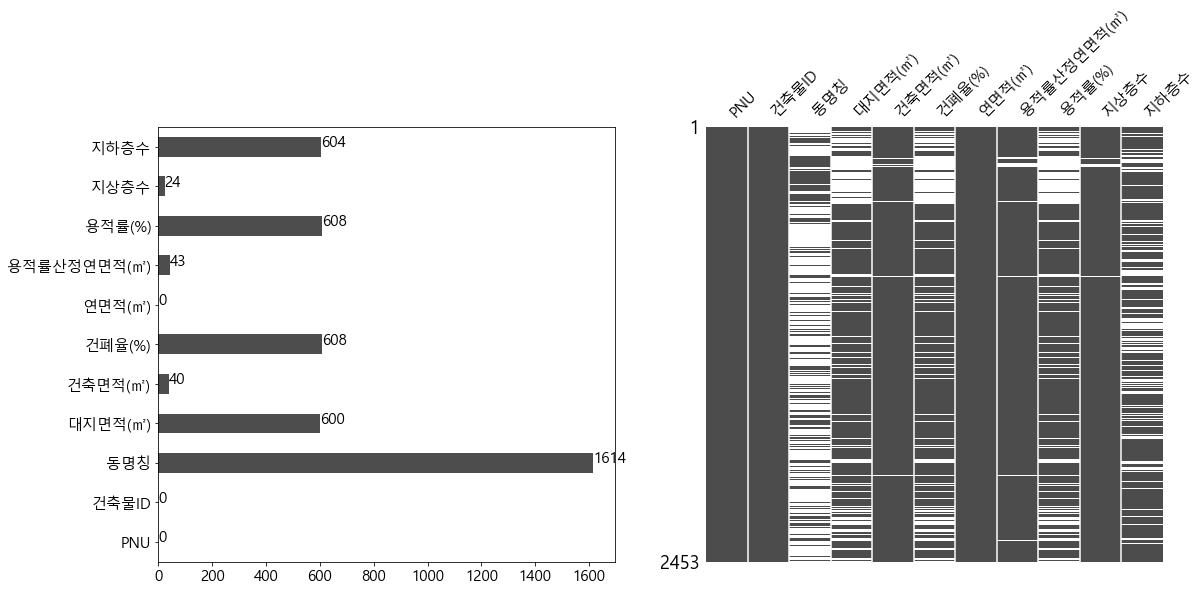

In [428]:
# 주요 항목들의 누락정도
# missingno 라이브러리를 활용하여 주요 항목들의 NaN. Null 의 분포정도를 파악

import missingno as msno

missing_data_check = daechi_data_copy[['PNU', '건축물ID', '동명칭', '대지면적(㎡)', '건축면적(㎡)', '건폐율(%)', '연면적(㎡)', '용적률산정연면적(㎡)', '용적률(%)', '지상층수', '지하층수']]
missing_data_check = missing_data_check.replace(0, np.NaN)

fig, ax = plt.subplots(1, 2, figsize=(18, 8))
missing_data_check.isnull().sum().plot.barh(ax = ax[0], color=(0.3, 0.3, 0.3), fontsize=15)
msno.matrix(df=missing_data_check.iloc[:, :], figsize=(8,8), ax=ax[1], color=(0.3, 0.3, 0.3), fontsize=15)

counts = list(missing_data_check.isnull().sum())
for i, v in enumerate(counts):
    ax[0].text(v, i, str(v), color='k', fontsize=15)

plt.show()

#### 데이터 주요 컬럼의 누락 정도

총 2453개의 대치동 표제부 데이터에서 건폐율과 관련된 일부 항목들의 누락정도이다.
건폐율은 608개, 대지면적은 600개 건축면적은 40개 즉, 현 대치동 표제부 데이터 중 건폐율 누락은 대부분 대지면적 데이터의 누락으로 볼 수 있으며 대지면적이 누락된 데이터들만 채워도 대부분의 건폐율의 계산이 가능할 것으로 보인다.

단, PNU 분석을 통해 건폐율이 누락된 608개의 데이터 중 중복제외한 PNU값들은 295개이지만 대지데이터에는 이중 280개의 PNU만이 있음을 확인했다. 즉, 대지면적 추가를 통해 해결할 수 있는 건폐율 값은 600개가 아닌 그 이하가 될 가능성이 높다.

흥미로운 점은 누락 연면적 데이터가 0개라는 것이다.
건축면적이 누락된 데이터는 40개인데 연면적 데이터는 모두 있다는 것은, 층수를 통해 대략적인 건축면적을 알 수 있음을 내포한다. 지하층수의 경우 누락데이터가 많아 보이지만 이는 0값을 NaN을 바꾸는 과정에서 지하층이 없는 건물이 모두 NaN값으로 바뀐것으로 예상되며, 지상층수가 누락된 24개정도만이 실제적으로 누락된 데이터로 예상된다.

In [374]:
# PNU 중복 데이터 확인

daechi_data_copy['PNU'].value_counts()

1168010600110270000    44
1168010600110140003    33
1168010600103160000    31
1168010600105110000    24
1168010600109850000    17
                       ..
1168010600109100016     1
1168010600109100015     1
1168010600109100014     1
1168010600109100013     1
1168010600109990000     1
Name: PNU, Length: 2118, dtype: int64

In [375]:
# PNU 1168010600110270000인 데이터 44개를 조회
# column은 PNU, 건축물ID, 동명칭, 대지면적, 건축면적, 건폐율, 연면적 등만 표기한다.

test_1 = daechi_data_copy.loc[daechi_data_copy['PNU'] == '1168010600110270000']
test_1 = test_1[['PNU', '건축물ID', '동명칭', '대지면적(㎡)', '건축면적(㎡)', '건폐율(%)', '연면적(㎡)', '용적률산정연면적(㎡)', '용적률(%)']]

In [376]:
test_1

,PNU,건축물ID,동명칭,대지면적(㎡),건축면적(㎡),건폐율(%),연면적(㎡),용적률산정연면적(㎡),용적률(%)
169,1168010600110270000,100255322,2단지 창고,0.0,0.00,0.0,1896.90,0.00,0.0
170,1168010600110270000,100255320,2단지 주민공동시설,0.0,0.00,0.0,1212.95,0.00,0.0
171,1168010600110270000,100255321,2단지 지하주차장,0.0,315.10,0.0,24670.52,0.00,0.0
172,1168010600110270000,100254102,112동,0.0,801.77,0.0,17707.91,17707.91,0.0
173,1168010600110270000,100255306,1단지 외부계단2,0.0,26.70,0.0,23.10,23.10,0.0
174,1168010600110270000,100254826,110동,0.0,801.77,0.0,13152.10,13152.10,0.0
175,1168010600110270000,100255319,2단지 외부계단,0.0,22.30,0.0,19.89,19.89,0.0
176,1168010600110270000,100253726,204동,0.0,662.75,0.0,17490.51,17490.51,0.0
177,1168010600110270000,100255316,2단지 문고,0.0,0.00,0.0,56.55,0.00,0.0
178,1168010600110270000,100255224,113동,0.0,658.67,0.0,7355.24,7355.24,0.0


### 중복 PNU 코드
위의 정보를 통해, 표제부 데이터중 동일한 PNU을 가진 데이터들이 존재함을 알 수 있다.<br>
관련 정보 확인 결과, 몇가지 경우에서 동일 PNU가 발생할 수 있는데<br>
1. 집합건물 : 아파트와 같은 집합건물일시 다수의 동과 부속건물들이 동일한 PNU를 공유하는것을 확인
2. 신축, 변경 등의 행정 처리 : 동일 PBU의 신축 및 토지분할, 변경도 표제부에 모두 기재됨을 확인.

또한, PNU의 정의를 보았을때 필지에 대한 고유번호이므로 대지수와 일치할 거라 예상했으나 중복제외한 PNU 수와 대지데이터의 수도 다르므로 이에 대한 해석이 필요하다.<br>
현재 관련 정보에 대한 사전지식의 부족으로 생각할 수 있는 경우는 2가지 정도이다.
1. 단순 누락
2. 일부 필지들의 병합


#### 중복된 PNU 코드를 가진 데이터
위의 예, PNU 1168010600110270000인 데이터 44개의 조회 결과를 보면 대지면적은 모두 누락되어 있으며 건축면적도 일부 누락되어 있음을 확인할 수 있다.<br>
건폐율 계산방법에 따라 둘 중 하나만이라도 누락 될 시 건폐율 또한 자동적으로 산출 불가하니, 누락된 대지면적과 건축면적들을 채우는 것을 최우선으로 한다.

### 누락 건폐율 처리

#### 건폐율 계산에 필요한 분류코드
분류된 서울시 건물데이터와 대지데이터에 PNU값을 연결한 뒤 각 Geometry를 활용하여 건물들의 건폐율은 어렵지 않게 계산 가능하다고 예상됨.<br>
그러나 집합건물을 하나의 표제부로 만들어 하나의 건폐율만 계산하지 않을 경우<br> 
즉, 현재 표제부와 같이 중복된 PNU들이 있고 이를 각 건물들(주, 부속)을 구분하여 건폐율 계산 및 입력이 필요하다면 PNU를 활용할 수 없으므로 다른 분류코드(건물)가 필요함.

표재부 내에 건축물관련 코드는 __관리건축물대장PK__가 있으며, __관리건축물대장PK__의 코드 구성에 대해 확인이 필요함. 그러나 구글 등에서 관리건축물대장PK의 정확한 구성체계 및 정보 확인 불가.<br>
앞 5자리(시군구) - 다음의 코드가 건물코드이고 서울시 건물데이터의 __A19 건축물ID__와 동일하다면 이를 활용할 수 있으며, 두 코드가 관련이 있다고 생각됨.

#### 건폐율 계산 진행 방법
1. 서울시 대지데이터를 활용 대지면적이 없는 데이터 처리
2. 서울시 건축데이터를 활용 건축면적이 없는 데이터 처리
3. 건폐율 계산
4. 대지면적, 건축면적이 서울시 대지, 건축데이터에 없는 데이터들의 수 파악 후 처리방안 재 검토

#### 관리건축물대장PK와 건축물ID와의 관계성 검토

In [369]:
# 표제부의 건폐율이 0인 항목의 관리건축물대장PK

building_code = daechi_data_copy.loc[daechi_data_copy['건폐율(%)'] == 0, '관리건축물대장PK']
building_code = building_code.map(lambda x:str(x)[6:])
building_code = building_code.tolist()

# 관리건축물대장PK의 중복 여부
# set로 변환시켜 list와 개수 비교 동일하면 중복없음

if len(set(building_code)) == len(building_code):
    result = True
else:
    result = False

print(f'building_code(건폐율이 0인 항목들의 관리건축물대장PK)의 수 : {len(building_code)}')
print(f'building_code 중복여부 : {result}')
print(f'building_code[:10] : {building_code[:10]}')

building_code(건폐율이 0인 항목들의 관리건축물대장PK)의 수 : 608
building_code 중복여부 : True
building_code[:10] : ['15503', '18329', '12486', '16127', '10839', '17344', '655', '658', '656', '654']


In [370]:
# 건폐율이 0인 PNU만 남긴 서울시 건물데이터에서 건축물ID 추출
# 건폐율이 0인 PNU만 남겼다는 의미는 즉 대치동만 남았다는 의미이므로
# 건축물ID가 다른 시군구와 중복되는것이 있더라도 해당 데이터셋에서는 대치동의 건축물ID와의 일치성만 확인 가능

building_ids = seoul_building_copy['A19'].unique()
print(f'building_ids(건폐율이 0인 PNU만 남긴 건물데이터의 건축물ID)의 수 : {len(building_ids)}')
print(f'building_ids[:10] : {building_ids[:10]}')

building_ids(건폐율이 0인 PNU만 남긴 건물데이터의 건축물ID)의 수 : 489
building_ids[:10] : ['23992' '23993' '9963' None '9965' '9964' '9962' '784' '785' '783']


In [371]:
# 관리건축물대장PK의 - 뒷자리들과 건물데이터의 건축물ID와의 연계성 확인
# 건축물ID가 관리건축물대장PK에 있으면 활용가능
# 총 489개의 건축물ID중 얼만큼의 ID가 관리건축물대장PK에 있는지에 따라 두 코드간의 관계성 확인 가능

common_codes = []
for i in building_ids:
    if i in building_code:
        common_codes.append(i)
        
print(f'building_ids(건폐율이 0인 PNU만 남긴 건물데이터의 건축물ID)의 수 : {len(building_ids)}')
print(f'building_code(관리건축물대장PK)에 포함된 building_ids(건축물ID)의 수 : {len(common_codes)}')

building_ids(건폐율이 0인 PNU만 남긴 건물데이터의 건축물ID)의 수 : 489
building_code(관리건축물대장PK)에 포함된 building_ids(건축물ID)의 수 : 462


건폐율이 0인 표제부 데이터 중 관리건축물대장PK값이 중복되지 않고, 표제부 데이터 내 건폐율이 0인 데이터 수 608개와 일치하므로 이를 활용하여 각 건물간의 분류 가능할 것으로 예상됨

In [372]:
# 관리건축물대장PK의 데이터 타입 변경 및 건축물ID 추출

daechi_data_copy.astype({'관리건축물대장PK' : 'str'})
daechi_data_copy['건축물ID'] = daechi_data_copy['관리건축물대장PK'].map(lambda x: x[6:])

In [373]:
daechi_data_copy.head(3)

,순번,대지위치,시군구코드,법정동코드,대지구분코드,번,지,관리건축물대장PK,대장구분코드,대장구분코드명,대장종류코드,대장종류코드명,도로명대지위치,건물명,특수지명,블록,로트,외필지수,새주소도로코드,새주소법정동코드,새주소지상지하코드,새주소본번,새주소부번,동명칭,주부속구분코드,주부속구분코드명,대지면적(㎡),건축면적(㎡),건폐율(%),연면적(㎡),용적률산정연면적(㎡),용적률(%),구조코드,구조코드명,기타구조,주용도코드,주용도코드명,기타용도,지붕코드,지붕코드명,기타지붕,세대수(세대),가구수(가구),높이(m),지상층수,지하층수,승용승강기수,비상용승강기수,부속건축물수,부속건축물면적(㎡),총동연면적(㎡),옥내기계식대수(대),옥내기계식면적(㎡),옥외기계식대수(대),옥외기계식면적(㎡),옥내자주식대수(대),옥내자주식면적(㎡),옥외자주식대수(대),옥외자주식면적(㎡),허가일,착공일,사용승인일,허가번호년,허가번호기관코드,허가번호기관코드명,허가번호구분코드,허가번호구분코드명,호수(호),에너지효율등급,에너지절감율,EPI점수,친환경건축물등급,친환경건축물인증점수,지능형건축물등급,지능형건축물인증점수,생성일자,내진설계적용여부,내진능력,PNU,건축물ID
0,1.0,서울특별시 강남구 대치동 1000-10번지,11680,10600,1,1000,0010,11680-100257592,1,일반,2,일반건축물,서울특별시 강남구 테헤란로104길 31,다온 빌딩,NaN,NaN,NaN,0,1.168042e+11,10601.0,0,31.0,NaN,주건축물제1동,0,주건축물,187.7,104.20,55.51,482.92,369.88,197.06,21,철근콘크리트구조,철근콘크리트구조,4000,제2종근린생활시설,제2종근린생활시설,10.0,(철근)콘크리트,평스라브,0,0,11.70,4,1,1,0,0,0.0,482.92,0,0.0,0,0.0,0,0.0,4,0.0,20151209.0,20160216.0,20160805.0,2015.0,3220175.0,건축과,1101.0,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,1.0,NaN,1168010600110000010,100257592
1,2.0,서울특별시 강남구 대치동 1000-12번지,11680,10600,1,1000,0012,11680-16423,1,일반,2,일반건축물,서울특별시 강남구 테헤란로104길 21,세아아인스,NaN,NaN,NaN,0,1.168042e+11,10601.0,0,21.0,NaN,NaN,0,주건축물,2097.4,1208.34,57.61,13955.67,7890.91,376.22,42,철골철근콘크리트구조,철골철근콘크리트조,10000,교육연구시설,업무시설 교육연구및복지시설,10.0,(철근)콘크리트,평슬라브,0,0,36.85,9,4,3,0,0,0.0,13955.67,21,0.0,0,0.0,47,0.0,0,0.0,19951226.0,19960207.0,20010901.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,1.0,NaN,1168010600110000012,16423
2,3.0,서울특별시 강남구 대치동 1000-1번지,11680,10600,1,1000,0001,11680-4257,1,일반,2,일반건축물,서울특별시 강남구 영동대로86길 18,NaN,NaN,NaN,NaN,0,1.168042e+11,10601.0,0,18.0,0.0,NaN,0,주건축물,375.7,172.58,45.94,1348.24,1088.84,289.82,21,철근콘크리트구조,철근콘크리트조,4000,제2종근린생활시설,근린생활시설,10.0,(철근)콘크리트,슬라브,0,0,23.50,7,1,0,0,0,0.0,1348.24,0,0.0,0,0.0,0,0.0,6,0.0,19890406.0,19900321.0,19910411.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20200424,1.0,NaN,1168010600110000001,4257


#### 누락 대지면적 데이터 처리

In [377]:
# 대지면적이 없는 데이터의 대지면적 채우기

seoul_land_copy_2 = seoul_land.copy()
miss_site_area = daechi_data_copy.loc[daechi_data_copy['대지면적(㎡)'] == 0, 'PNU'].unique()

seoul_land_copy_2 = seoul_land_copy_2.loc[seoul_land_copy_2['A1'].isin(miss_site_area)]
print(len(seoul_land_copy_2))
seoul_land_copy_2.head(3)

277


,A0,A1,A2,A3,A4,A5,A6,geometry
840135,248054,1168010600100020007,1168010600,서울특별시 강남구 대치동,2-7,2-7 주,2021-06-23,"POLYGON ((206747.223 444024.404, 206807.687 444046.533, 206814.608 444027.685, 206754.235 444005.677, 206747.259 444024.306, 206747.223 444024.404))"
840159,128214,1168010600100210001,1168010600,서울특별시 강남구 대치동,21-1,21-1 주,2021-06-23,"POLYGON ((206627.289 443983.657, 206626.413 443982.105, 206622.190 443968.114, 206618.729 443945.515, 206618.175 443935.553, 206600.057 443934.896, 206607.341 443976.105, 206607.549 443976.186, 206627.289 443983.657))"
840170,196417,1168010600100270001,1168010600,서울특별시 강남구 대치동,27-1,27-1 잡,2021-06-23,"POLYGON ((206524.545 444191.540, 206515.008 444194.204, 206523.170 444204.866, 206529.294 444211.172, 206532.379 444209.470, 206536.675 444214.771, 206544.002 444223.840, 206547.810 444228.280, 206562.894 444234.450, 206570.767 444237.331, 206576.083 444238.955, 206589.943 444242.971, 206613.638 444244.903, 206621.359 444244.524, 206668.543 444243.048, 206688.550 444240.480, 206702.973 444238.822, 206712.221 444213.197, 206733.104 444219.334, 206739.105 444216.909, 206746.980 444195.569, 206746.742 444192.425, 206743.162 444187.932, 206723.260 444180.557, 206736.563 444143.928, 206774.859 444158.140, 206779.538 444155.384, 206790.122 444125.709, 206802.298 444121.057, 206806.525 444122.548, 206815.240 444098.837, 206812.152 444097.673, 206783.740 444086.909, 206754.789 444076.013, 206712.570 444060.192, 206687.844 444050.917, 206676.765 444046.618, 206641.330 444033.055, 206617.224 444023.771, 206600.121 444017.176, 206545.066 443996.322, 206543.846 443996.188, 206536.446 443996.32..."


polygon_0 area : 1288.859275983803
polygon_1 area : 750.6748300197344
polygon_2 area : 50851.28009105765


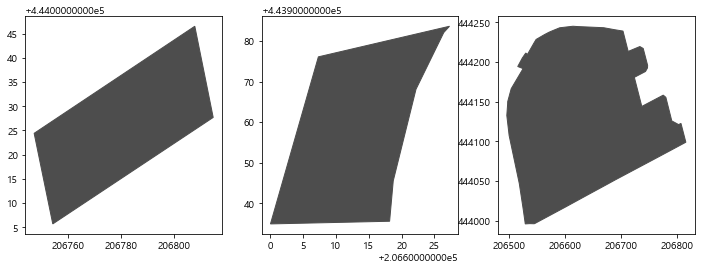

In [578]:
# Test Calculation Area of Polygons

fig, ax = plt.subplots(1, 3, figsize = (12,4))
for i in range(3):
    polygon_pts = seoul_land_copy_2.iloc[i, 7]
    polygon = Polygon(polygon_pts)
    polygon_area = polygon.area
    ax[i].fill(*polygon.exterior.xy, color=(0.3, 0.3, 0.3))
    print(f'polygon_{i} area : {polygon_area}')
#     ax[i].set_title(f'polygon area : {polygon_area}')

plt.show()

#### 토지이용계획열람 서비스 확인

일부 데이터의 토지이용계획열람 서비스 조회 결과 면적정보 및 대지폴리곤 일치 확인함<br>
URL : http://www.eum.go.kr/web/am/amMain.jsp

In [382]:
seoul_land_copy_2['area'] = seoul_land_copy_2['geometry'].area
seoul_land_copy_2['area'] = seoul_land_copy_2['area'].map(lambda x:round(x, 2))
seoul_land_copy_2.head(3)

,A0,A1,A2,A3,A4,A5,A6,geometry,area
840135,248054,1168010600100020007,1168010600,서울특별시 강남구 대치동,2-7,2-7 주,2021-06-23,"POLYGON ((206747.223 444024.404, 206807.687 444046.533, 206814.608 444027.685, 206754.235 444005.677, 206747.259 444024.306, 206747.223 444024.404))",1288.86
840159,128214,1168010600100210001,1168010600,서울특별시 강남구 대치동,21-1,21-1 주,2021-06-23,"POLYGON ((206627.289 443983.657, 206626.413 443982.105, 206622.190 443968.114, 206618.729 443945.515, 206618.175 443935.553, 206600.057 443934.896, 206607.341 443976.105, 206607.549 443976.186, 206627.289 443983.657))",750.67
840170,196417,1168010600100270001,1168010600,서울특별시 강남구 대치동,27-1,27-1 잡,2021-06-23,"POLYGON ((206524.545 444191.540, 206515.008 444194.204, 206523.170 444204.866, 206529.294 444211.172, 206532.379 444209.470, 206536.675 444214.771, 206544.002 444223.840, 206547.810 444228.280, 206562.894 444234.450, 206570.767 444237.331, 206576.083 444238.955, 206589.943 444242.971, 206613.638 444244.903, 206621.359 444244.524, 206668.543 444243.048, 206688.550 444240.480, 206702.973 444238.822, 206712.221 444213.197, 206733.104 444219.334, 206739.105 444216.909, 206746.980 444195.569, 206746.742 444192.425, 206743.162 444187.932, 206723.260 444180.557, 206736.563 444143.928, 206774.859 444158.140, 206779.538 444155.384, 206790.122 444125.709, 206802.298 444121.057, 206806.525 444122.548, 206815.240 444098.837, 206812.152 444097.673, 206783.740 444086.909, 206754.789 444076.013, 206712.570 444060.192, 206687.844 444050.917, 206676.765 444046.618, 206641.330 444033.055, 206617.224 444023.771, 206600.121 444017.176, 206545.066 443996.322, 206543.846 443996.188, 206536.446 443996.32...",50851.28


In [434]:
# PNU : 대지면적 dict 생성

site_area_dict = {}

for i in range(len(seoul_land_copy_2)):
    pnu = seoul_land_copy_2.iloc[i, 1]
    area = seoul_land_copy_2.iloc[i, 8]
    site_area_dict[pnu] = area
    
site_area_dict

{'1168010600100020007': 1288.86,
 '1168010600100210001': 750.67,
 '1168010600100270001': 50851.28,
 '1168010600100500045': 866.96,
 '1168010600100630000': 30059.7,
 '1168010600100660000': 47061.06,
 '1168010600100780024': 15140.73,
 '1168010600103160000': 239228.99,
 '1168010600104470000': 421.78,
 '1168010600104480000': 492.48,
 '1168010600105000000': 36959.88,
 '1168010600105010000': 19812.3,
 '1168010600105030000': 51768.33,
 '1168010600105060000': 78636.16,
 '1168010600105070001': 2799.75,
 '1168010600105100000': 14335.29,
 '1168010600105110000': 195080.44,
 '1168010600106010000': 479.31,
 '1168010600106020000': 2260.36,
 '1168010600106030000': 495.16,
 '1168010600106040000': 731.65,
 '1168010600106230000': 2254.66,
 '1168010600106260000': 3084.43,
 '1168010600106280000': 649.33,
 '1168010600106470000': 2271.83,
 '1168010600106700000': 49160.56,
 '1168010600108880000': 36229.2,
 '1168010600108890005': 108.75,
 '1168010600108900012': 306.65,
 '1168010600108900056': 799.82,
 '1168010

In [470]:
# PNU에 따른 area 면적 검색 후 return 함수 생성

def insert_area(pnu):
    global site_area_dict
    if pnu in site_area_dict.keys():
        area = site_area_dict[pnu]
    else:
        area = 0
    return area

# 대치동 표제부 대지면적값이 누락인 데이터는 위의 함수를 통해 면적값 입력 

daechi_data_copy['대지면적(㎡)'] = daechi_data_copy.apply(lambda x: insert_area(x['PNU']) if x['대지면적(㎡)'] == 0 else x['대지면적(㎡)'], axis=1)

In [489]:
print(f'누락된 대지면적 데이터 수 : {len(daechi_data_copy.loc[daechi_data_copy["대지면적(㎡)"] == 0])}')

누락된 대지면적 데이터 수 : 17


수행 전 대지면적 누락 데이터 수 600개<br>
수행 후 대지면적 누락 데이터 수 17개로 583개 누락값 입력됨

#### 누락 건축면적 데이터 처리

In [499]:
# 건축면적이 없는 데이터의 건축면적 채우기

seoul_building_copy_2 = seoul_building.copy()
miss_building_area = daechi_data_copy.loc[daechi_data_copy['건축면적(㎡)'] == 0, '건축물ID'].unique()

# 건축물ID가 중복될 수 있으니 시군구코드로 대치동 데이터 제외 

seoul_building_copy_2['시군구'] = seoul_building_copy_2['A2'].apply(lambda x: x[:5])
seoul_building_copy_2 = seoul_building_copy_2.loc[seoul_building_copy_2['시군구'] == '11680']

seoul_building_copy_2 = seoul_building_copy_2.loc[seoul_building_copy_2['A19'].isin(miss_building_area)]
print(len(seoul_building_copy_2))
seoul_building_copy_2.head(3)

5


,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,geometry,시군구
616719,21959,1981205937684447192400000000,1168010600100780024,1168010600,서울특별시 강남구 대치동,78-24,1,일반,03000,제1종근린생활시설,21,철근콘크리트구조,0.0,1981-05-31,1346.61,0.0,0.0,0.0,0.0,14145,N,B00100000000WB8HA,2019-03-07,"POLYGON ((205934.958 444741.761, 205943.849 444719.574, 205946.739 444720.542, 205954.894 444700.041, 205940.426 444694.448, 205934.973 444707.699, 205932.769 444713.073, 205932.004 444712.855, 205920.880 444740.230, 205933.427 444745.542, 205934.958 444741.761))",11680
618450,6488,1984205395974450918500000000,1168010600109450003,1168010600,서울특별시 강남구 대치동,945-3,1,일반,14000,업무시설,21,철근콘크리트구조,0.0,1984-09-11,2125.11,0.0,0.0,0.0,0.0,6857,N,B00100000000WAPIR,2019-03-07,"POLYGON ((205409.037 445079.678, 205394.459 445073.460, 205382.943 445104.492, 205397.491 445110.023, 205409.037 445079.678))",11680
618869,17068,1995205377324444970800000000,1168010600109710006,1168010600,서울특별시 강남구 대치동,971-6,1,일반,02000,공동주택,11,벽돌구조,0.0,1995-05-20,195.21,127.8,6.9,0.0,0.0,23460,N,B00100000000WBDLJ,2019-03-07,"POLYGON ((205381.075 444502.143, 205382.668 444493.299, 205377.511 444492.424, 205377.371 444492.893, 205374.183 444492.518, 205373.933 444494.018, 205372.777 444493.893, 205371.747 444500.331, 205381.075 444502.143))",11680


In [509]:
# 건물면적 산출

seoul_building_copy_2['area'] = seoul_building_copy_2['geometry'].area
seoul_building_copy_2['area'] = seoul_building_copy_2['area'].map(lambda x:round(x, 2))

# 건축물ID : 건물면적 dict 생성

building_area_dict = {}

for i in range(len(seoul_building_copy_2)):
    building_id = seoul_building_copy_2.iloc[i, 19]
    area = seoul_building_copy_2.iloc[i, 25]
    building_area_dict[building_id] = area
    
building_area_dict

{'14145': 725.43, '6857': 514.66, '23460': 80.65, '441': 930.3, '654': 696.81}

In [516]:
# PNU에 따른 area 면적 검색 후 return 함수 생성

def insert_building_area(building_id):
    global building_area_dict
    if building_id in building_area_dict.keys():
        area = building_area_dict[building_id]
    else:
        area = 0
    return area

# 대치동 표제부 대지면적값이 누락인 데이터는 위의 함수를 통해 면적값 입력 

daechi_data_copy['건축면적(㎡)'] = daechi_data_copy.apply(lambda x: insert_building_area(x['건축물ID']) if x['건축면적(㎡)'] == 0 else x['건축면적(㎡)'], axis=1)

In [517]:
print(f'누락된 건축면적 데이터 수 : {len(daechi_data_copy.loc[daechi_data_copy["건축면적(㎡)"] == 0])}')

누락된 건축면적 데이터 수 : 35


수행 전 건축면적 누락 데이터 수 40개<br>
수행 후 건축면적 누락 데이터 수 35개로 5개 누락값 입력됨

#### 누락 건폐율 계산

In [540]:
# 건폐율 계산 함수 작성
# 건폐율 공식 : 건축면적 / 대지면적 * 100(%)

def calculation_ratio(building_area, site_area):
    if site_area == 0 or building_area == 0:
        return 0
    else:
        return round((building_area / site_area * 100), 2)

daechi_data_copy['Result'] = daechi_data_copy.apply(lambda x: calculation_ratio(x['건축면적(㎡)'], x['대지면적(㎡)']) if x['건폐율(%)'] == 0 else x['건폐율(%)'], axis=1)

In [550]:
print(f"누락된 건폐율 데이터 수(전) : {len(daechi_data_copy.loc[daechi_data_copy['건폐율(%)'] == 0])}")
print(f"누락된 건폐율 데이터 수(후) : {len(daechi_data_copy.loc[daechi_data_copy['Result'] == 0])}")
print(f"누락된 건폐율 데이터 중 새로 계산된 데이터 수 : {len(daechi_data_copy.loc[daechi_data_copy['건폐율(%)'] == 0]) - len(daechi_data_copy.loc[daechi_data_copy['Result'] == 0])}")

누락된 건폐율 데이터 수(전) : 608
누락된 건폐율 데이터 수(후) : 52
누락된 건폐율 데이터 중 새로 계산된 데이터 수 : 556


### 계산값 확인

새로 계산된 건폐율값의 적합성 확인(건폐율의 % 특성)

건폐율의 특성상 100을 넘을 수 없고, 용도에 따라 달라지지만 대부분 50-70%인 점을 감안하여, 계산된 건폐율 값 중 70(%)를 넘는 값을 확인하고 이유를 확인한다.
먼저, 기존 건폐율 컬럼의 값 중 70을 넘는 데이터의 값 및 수 확인한 뒤 신규 건폐율 컬럼의 값 중 70을 넘는 데이터의 값 및 수 확인

확인 결과<br>
기존 건폐율 컬럼 값 중 70(%) 초과 데이터 수량 : 10<br>
기존 건폐율 + 신규 건폐율 값 중 초과 데이터 수량 : 28<br>

즉, 누락된 건폐율 값들 중 신규 계산된 약 550개의 데이터 중 18개 정도가 70(%)를 넘으며 개중 약 10개정도는 100(%)를 넘는 것으로 확인된다. 해당 데이터들을 다시 확인하고, 원인을 분석한다.<br>

예상되는 원인
1. 대지데이터, 건축데이터의 Geometry 정보의 불일치
2. PNU, 건축물ID와 같이 연결코드 혹은 전환과정에서의 데이터 오류
3. 기존 입력값들의 정보의 불일치

In [548]:
# 기존 건폐율 컬럼 값 중 70(%) 초과 값 확인 

over_ratio_1 = []

for r in daechi_data_copy['건폐율(%)']:
    if r > 70:
        over_ratio_1.append(r)

print(len(over_ratio_1))
print(over_ratio_1)

10
[71.41, 71.44, 74.42, 75.8, 564.91, 100.0, 86.11, 71.02, 99.05, 70.41]


In [549]:
# 신규 계산 건폐율 컬럼 값 중 70(%) 초과 값 확인 

over_ratio_2 = []

for r in daechi_data_copy['Result']:
    if r > 70:
        over_ratio_2.append(r)

print(len(over_ratio_2))
print(over_ratio_2)

28
[71.41, 97.68, 95.14, 724.28, 1086.42, 1434.42, 1434.61, 1570.11, 272.67, 71.44, 74.42, 208.54, 75.8, 119.98, 105.31, 73.5, 96.3, 564.91, 100.0, 98.21, 5311.68, 86.11, 71.02, 149.14, 99.05, 70.41, 360.57, 148.92]


In [553]:
daechi_data_copy.loc[daechi_data_copy['Result'] > 100].head(3)

,순번,대지위치,시군구코드,법정동코드,대지구분코드,번,지,관리건축물대장PK,대장구분코드,대장구분코드명,대장종류코드,대장종류코드명,도로명대지위치,건물명,특수지명,블록,로트,외필지수,새주소도로코드,새주소법정동코드,새주소지상지하코드,새주소본번,새주소부번,동명칭,주부속구분코드,주부속구분코드명,대지면적(㎡),건축면적(㎡),건폐율(%),연면적(㎡),용적률산정연면적(㎡),용적률(%),구조코드,구조코드명,기타구조,주용도코드,주용도코드명,기타용도,지붕코드,지붕코드명,기타지붕,세대수(세대),가구수(가구),높이(m),지상층수,지하층수,승용승강기수,비상용승강기수,부속건축물수,부속건축물면적(㎡),총동연면적(㎡),옥내기계식대수(대),옥내기계식면적(㎡),옥외기계식대수(대),옥외기계식면적(㎡),옥내자주식대수(대),옥내자주식면적(㎡),옥외자주식대수(대),옥외자주식면적(㎡),허가일,착공일,사용승인일,허가번호년,허가번호기관코드,허가번호기관코드명,허가번호구분코드,허가번호구분코드명,호수(호),에너지효율등급,에너지절감율,EPI점수,친환경건축물등급,친환경건축물인증점수,지능형건축물등급,지능형건축물인증점수,생성일자,내진설계적용여부,내진능력,PNU,건축물ID,Result
396,397.0,서울특별시 강남구 대치동 65번지,11680,10600,1,0065,0000,11680-2614,2,집합,3,표제부,서울특별시 강남구 영동대로 220,쌍용대치아파트9동,NaN,NaN,NaN,0,1.168021e+11,10604.0,0,220.0,NaN,9,0,주건축물,54.20,392.56,0.0,5754.00,5357.52,0.0,21,철근콘크리트구조,철근콘크리트조,2000,공동주택,주거시설,10.0,(철근)콘크리트,슬라브,56,0,0.0,14,1,0,0,0,0.0,5754.00,0,0.0,0,0.0,0,0.0,0,0.0,19821130.0,NaN,19831130.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20171206,NaN,NaN,1168010600100650000,2614,724.28
397,398.0,서울특별시 강남구 대치동 65번지,11680,10600,1,0065,0000,11680-2616,2,집합,3,표제부,서울특별시 강남구 영동대로 220,쌍용대치아파트10동,NaN,NaN,NaN,0,1.168021e+11,10604.0,0,220.0,NaN,10,0,주건축물,54.20,588.84,0.0,8623.44,8036.28,0.0,21,철근콘크리트구조,철근콘크리트조,2000,공동주택,주거시설,10.0,(철근)콘크리트,슬라브,84,0,0.0,14,1,0,0,0,0.0,8623.44,0,0.0,0,0.0,0,0.0,0,0.0,19821130.0,NaN,19831130.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20171206,NaN,NaN,1168010600100650000,2616,1086.42
398,399.0,서울특별시 강남구 대치동 65번지,11680,10600,1,0065,0000,11680-2615,2,집합,3,표제부,서울특별시 강남구 영동대로 220,쌍용대치아파트8동,NaN,NaN,NaN,0,1.168021e+11,10604.0,0,220.0,NaN,8,0,주건축물,75.13,1077.68,0.0,15892.80,14810.88,0.0,21,철근콘크리트구조,철근콘크리트조,2000,공동주택,주거시설,10.0,(철근)콘크리트,슬라브,112,0,0.0,14,1,0,0,0,0.0,15892.80,0,0.0,0,0.0,0,0.0,0,0.0,19821130.0,NaN,19831130.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20171206,NaN,NaN,1168010600100650000,2615,1434.42


In [555]:
# 쌍용대치아파트의 경우 대지면적이 잘못 입력된것으로 보인다
# 그러나 대지면적 누락으로 새로 편집한 서울시 대지데이터에는 해당 값이 존재 하지 않는 것을 확인.
# 기존 표제부 데이터에 입력되어 있던 값으로 확인됨.

seoul_land_copy_2.loc[seoul_land_copy_2['A1'] == '1168010600100650000']

,A0,A1,A2,A3,A4,A5,A6,geometry,area


In [560]:
# 편집전 전체 서울시 대지데이터에서 해당 PNU값의 데이터를 확인
# 기존 표제부 데이터의 대지면적이 오입력된 것을 확인

seoul_land.loc[seoul_land['A1'] == '1168010600100650000']

,A0,A1,A2,A3,A4,A5,A6,geometry
840197,126821,1168010600100650000,1168010600,서울특별시 강남구 대치동,65,65대,2021-06-23,"POLYGON ((206183.749 444241.814, 206197.100 444227.337, 206202.004 444222.230, 206212.431 444211.636, 206214.726 444209.572, 206220.368 444205.197, 206242.096 444186.602, 206250.885 444179.055, 206253.911 444175.617, 206255.290 444174.352, 206270.992 444187.312, 206271.677 444186.716, 206280.174 444174.773, 206281.338 444173.141, 206296.650 444139.382, 206293.967 444132.715, 206292.981 444132.381, 206284.016 444129.349, 206232.162 444111.456, 206214.071 444104.390, 206151.902 444080.710, 206130.671 444073.576, 206122.219 444070.334, 206079.351 444054.404, 206066.823 444049.542, 206049.540 444043.029, 206046.521 444049.996, 206027.365 444093.183, 206100.619 444120.069, 206112.133 444141.329, 206095.635 444186.307, 206092.997 444193.400, 206104.414 444202.409, 206113.256 444209.422, 206133.188 444216.373, 206137.358 444220.394, 206143.242 444222.609, 206155.530 444227.181, 206159.897 444232.592, 206183.749 444241.814))"


840197    24463.339686
dtype: float64

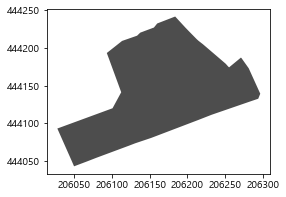

In [576]:
polygon_pts = seoul_land.loc[seoul_land['A1'] == '1168010600100650000', 'geometry']
polygon_pts.plot(figsize=(4,4), color=(0.3, 0.3, 0.3))
polygon_pts.area

In [580]:
# 대치동 표제부 copy전 데이터의 해당 건축물(쌍용대치아파트)의 번지로 확인 결과,
# 이미 대지 면적이 입력되어있는것을 확인
# 대치동 표제부 파일의 데이터 오기값으로 보면 될 듯 하다.

daechi_data.loc[daechi_data['번'] == '0065', '대지면적(㎡)']

396    54.20
397    54.20
398    75.13
399    75.12
Name: 대지면적(㎡), dtype: float64

#### 재계산 방법

1. 건폐율이 70(%)가 넘는 값들의 PNU와 건축물ID를 저장
2. PNU로 geometry 대지면적 재조회
3. 건축물ID로 geometry 건축면적 재조회
4. 재조회한 대지면적과 건축면적으로 건폐율 재계산


In [590]:
recalc_pnus = daechi_data_copy.loc[daechi_data_copy['Result'] > 70, 'PNU']
recalc_ids = daechi_data_copy.loc[daechi_data_copy['Result'] > 70, '건축물ID']

recalc_list = [[i,j] for i,j in zip(recalc_pnus, recalc_ids)]
recalc_list

[['1168010600110010008', '13827'],
 ['1168010600110130000', '659'],
 ['1168010600106230000', '19694'],
 ['1168010600100650000', '2614'],
 ['1168010600100650000', '2616'],
 ['1168010600100650000', '2615'],
 ['1168010600100650000', '2613'],
 ['1168010600108890005', '12750'],
 ['1168010600108900012', '20475'],
 ['1168010600108900044', '24143'],
 ['1168010600108900008', '19884'],
 ['1168010600108940001', '9651'],
 ['1168010600108970019', '23868'],
 ['1168010600109070006', '19611'],
 ['1168010600109080002', '23238'],
 ['1168010600109080009', '10248'],
 ['1168010600109090000', '18033'],
 ['1168010600109330019', '18435'],
 ['1168010600109340000', '8147'],
 ['1168010600109360018', '12901'],
 ['1168010600109360031', '18895'],
 ['1168010600109400007', '19287'],
 ['1168010600109430009', '9089'],
 ['1168010600109450003', '6857'],
 ['1168010600109560009', '5518'],
 ['1168010600109620023', '11468'],
 ['1168010600109840001', '16736'],
 ['1168010600109910010', '6531']]

In [600]:
# 건축면적 검색할 대치동 건축물 데이터 작성

seoul_building_daechi = seoul_building.copy()
seoul_building_daechi['시군구'] = seoul_building_daechi['A2'].apply(lambda x:x[:5])
seoul_building_daechi = seoul_building_daechi.loc[seoul_building_daechi['시군구'] == '11680']

In [655]:
# 대지면적은 전체 대지데이터에서 조회
# 건축면적은 대치동 건축물데이터에서 조회

recalc_result = []

for i in range(len(recalc_list)):
    site_area = seoul_land.loc[seoul_land['A1'] == recalc_list[i][0], 'geometry'].area
    building_area = seoul_building_daechi.loc[seoul_building_daechi['A19'] == recalc_list[i][1], 'geometry'].area
    try:
        site_area = float(site_area)
    except:
        site_area = 0
    try:
         building_area= float(building_area)
    except:
        building_area = 0
    
    if site_area != 0 and building_area != 0:
        ratio = round((building_area / site_area * 100), 2)
    else:
        ratio = 0
        
    recalc_result.append([recalc_list[i][0],recalc_list[i][1], round(site_area, 2), round(building_area, 2), ratio])
    
recalc_result

[['1168010600110010008', '13827', 603.63, 459.93, 76.2],
 ['1168010600110130000', '659', 2537.76, 2564.46, 101.05],
 ['1168010600106230000', '19694', 2254.66, 2163.35, 95.95],
 ['1168010600100650000', '2614', 24463.34, 422.52, 1.73],
 ['1168010600100650000', '2616', 24463.34, 636.96, 2.6],
 ['1168010600100650000', '2615', 24463.34, 1146.06, 4.68],
 ['1168010600100650000', '2613', 24463.34, 1145.92, 4.68],
 ['1168010600108890005', '12750', 108.75, 978.99, 900.24],
 ['1168010600108900012', '20475', 306.65, 691.54, 225.52],
 ['1168010600108900044', '24143', 325.5, 226.03, 69.44],
 ['1168010600108900008', '19884', 339.33, 692.44, 204.06],
 ['1168010600108940001', '9651', 431.94, 778.62, 180.26],
 ['1168010600108970019', '23868', 292.48, 194.17, 66.39],
 ['1168010600109070006', '19611', 182.29, 0, 0],
 ['1168010600109080002', '23238', 535.87, 588.27, 109.78],
 ['1168010600109080009', '10248', 276.95, 265.54, 95.88],
 ['1168010600109090000', '18033', 448.41, 418.12, 93.25],
 ['11680106001093

#### 재계산값 검토

해당 과정 후에도 일부 건폐율값들이 부적절한 데이터들을 확인할 수 있다.<br>
범위는 동일하게 건폐율이 70%를 초과하는 데이터로 설정하였다.

In [656]:
check_pnu_buildingid = []
for i in recalc_result:
    if i[4] > 70:
        check_pnu_buildingid.append(i)

check_pnu_buildingid

[['1168010600110010008', '13827', 603.63, 459.93, 76.2],
 ['1168010600110130000', '659', 2537.76, 2564.46, 101.05],
 ['1168010600106230000', '19694', 2254.66, 2163.35, 95.95],
 ['1168010600108890005', '12750', 108.75, 978.99, 900.24],
 ['1168010600108900012', '20475', 306.65, 691.54, 225.52],
 ['1168010600108900008', '19884', 339.33, 692.44, 204.06],
 ['1168010600108940001', '9651', 431.94, 778.62, 180.26],
 ['1168010600109080002', '23238', 535.87, 588.27, 109.78],
 ['1168010600109080009', '10248', 276.95, 265.54, 95.88],
 ['1168010600109090000', '18033', 448.41, 418.12, 93.25],
 ['1168010600109360018', '12901', 183.56, 197.54, 107.62],
 ['1168010600109360031', '18895', 10.19, 545.15, 5347.33],
 ['1168010600109430009', '9089', 373.37, 275.87, 73.89],
 ['1168010600109450003', '6857', 345.09, 514.66, 149.14],
 ['1168010600109620023', '11468', 744.66, 528.24, 70.94],
 ['1168010600109840001', '16736', 137.27, 505.32, 368.11],
 ['1168010600109910010', '6531', 234.45, 370.76, 158.14]]

주소 : 842946    서울특별시 강남구 대치동1001-8
dtype: object, 대지면적 : 603.63
주소 : 843153    서울특별시 강남구 대치동1013
dtype: object, 대지면적 : 2537.76
주소 : 840341    서울특별시 강남구 대치동623
dtype: object, 대지면적 : 2254.66
주소 : 840398    서울특별시 강남구 대치동889-5
dtype: object, 대지면적 : 108.75
주소 : 840469    서울특별시 강남구 대치동890-12
dtype: object, 대지면적 : 306.65
주소 : 840465    서울특별시 강남구 대치동890-8
dtype: object, 대지면적 : 339.33
주소 : 840567    서울특별시 강남구 대치동894-1
dtype: object, 대지면적 : 431.94
주소 : 841043    서울특별시 강남구 대치동908-2
dtype: object, 대지면적 : 535.87
주소 : 841050    서울특별시 강남구 대치동908-9
dtype: object, 대지면적 : 276.95
주소 : 841064    서울특별시 강남구 대치동909
dtype: object, 대지면적 : 448.41
주소 : 841892    서울특별시 강남구 대치동936-18
dtype: object, 대지면적 : 183.56
주소 : 841904    서울특별시 강남구 대치동936-31
dtype: object, 대지면적 : 10.19
주소 : 842033    서울특별시 강남구 대치동943-9
dtype: object, 대지면적 : 373.37
주소 : 842069    서울특별시 강남구 대치동945-3
dtype: object, 대지면적 : 345.09
주소 : 842423    서울특별시 강남구 대치동962-23
dtype: object, 대지면적 : 744.66
주소 : 842752    서울특별시 강남구 대치동984-1
dtype: object, 대지면적 

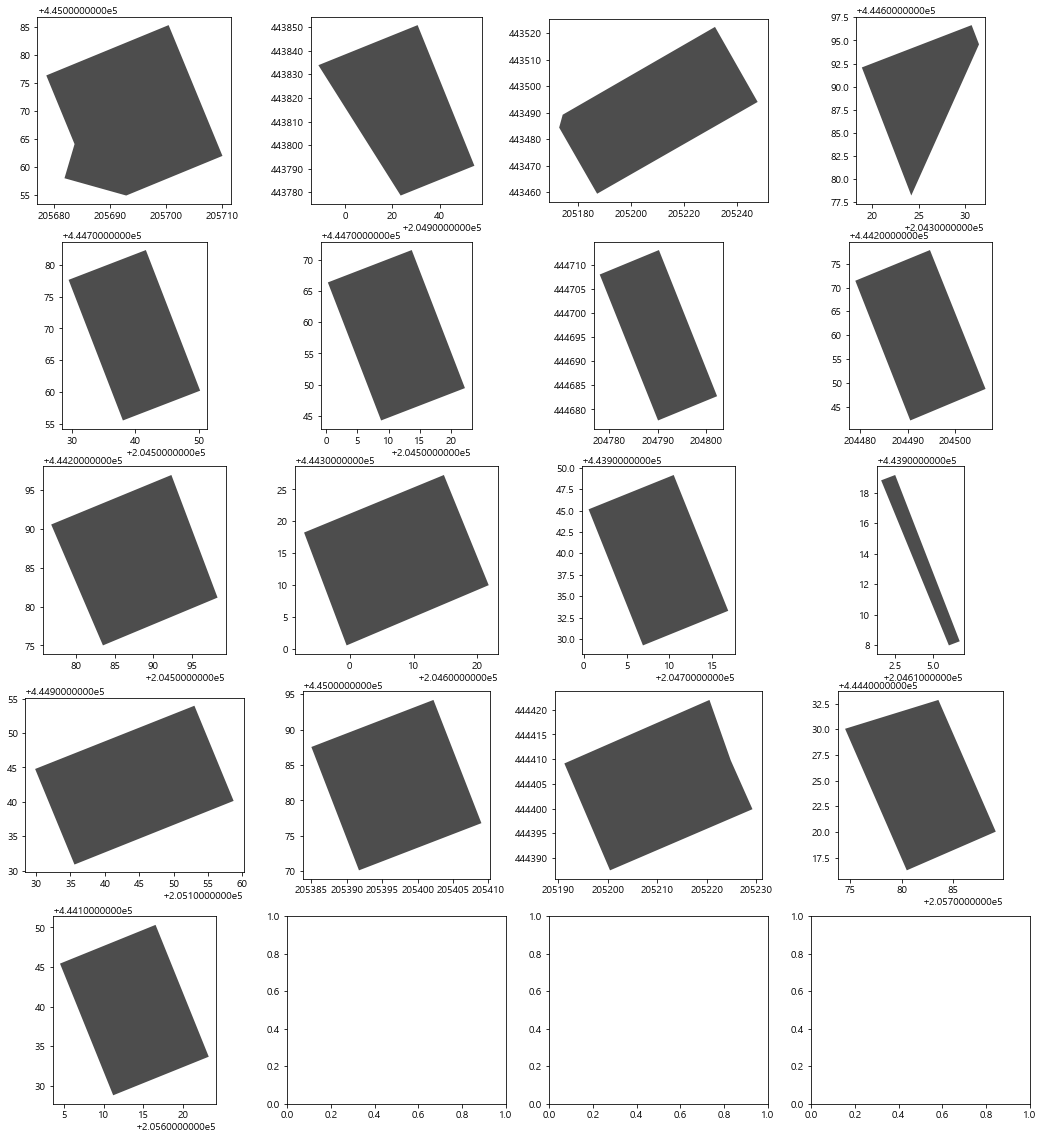

In [672]:
# 대지 일치 확인

site_polygons = []

if len(check_pnu_buildingid) % 4 == 0:
    n = len(check_pnu_buildingid) // 4
else:
    n = (len(check_pnu_buildingid) // 4) + 1
    
fig, ax = plt.subplots(n, 4, figsize=(18, n*4))

for j in range(n):
    for k in range(4):
        if (j*4)+k < len(check_pnu_buildingid):
            site_area = check_pnu_buildingid[(j*4)+k][2]
            site = seoul_land.loc[seoul_land['A1'] == check_pnu_buildingid[(j*4)+k][0], 'geometry']
            add_0 = seoul_land.loc[seoul_land['A1'] == check_pnu_buildingid[(j*4)+k][0], 'A3']
            add_1 = seoul_land.loc[seoul_land['A1'] == check_pnu_buildingid[(j*4)+k][0], 'A4']
#             add_2 = seoul_land.loc[seoul_land['A1'] == check_pnu_buildingid[(j*4)+k][0], 'A5']
            site.plot(ax = ax[j][k], color=(0.3, 0.3, 0.3))
            print(f'주소 : {add_0 + add_1}, 대지면적 : {site_area}')


#### 부적절 건폐율 데이터 토지이용계획열람 결과

토지이용계획열람 사이트와 서울시 부동산정보통합열람 사이트를 이용하였으며, 토지 주소 17개의 토지이용계획의 면적 검색 결과 모두 일치함을 확인.<br>
해당 사이트의 결과가 옳다고 가정할 때, 부적절한 건폐율값의 원인은 __건축면적__값의 불일치가 되겠지만 __그러나, 일부 대지의 현황을 보면 병합되어 사용되고 있는 토지들이 있음을 알 수 있고 병합되어 사용되는 대지의 경우도 부적절한 건폐율의 한 이유로 예상됨.__


주소 : 서울특별시 강남구 대치동1001-8<br>
dtype: object, 대지면적 : 603.63, 조회결과 : 603.6, 일치<br>
건축물정보 조회결과 : 관련지번 1001-10, 1001-9 확인되며 병합되어 사용됨.

주소 : 843153    서울특별시 강남구 대치동1013<br>
dtype: object, 대지면적 : 2537.76, 조회결과 : 2537.8, 일치<br>
건축물정보 조회결과 : 관련지번 1013-1, 1013-2, 1013-3 확인되며 병합되어 사용됨.<br>

주소 : 840341    서울특별시 강남구 대치동623<br>
dtype: object, 대지면적 : 2254.66, 조회결과 : 2254.9, 일치<br>
건축물정보 조회결과 : 관련지번 624 확인되며 병합되어 사용됨.<br>
건축면적은 해당 PNU와 건축물ID 정보와 유사한 값으로 일치.<br>
__즉, 해당 주소의 대지와 건축물의 Geometry 정보는 올바르나 대지의 병합여부가 확인되지 않아 부적절한 건폐율값을 얻음.__

주소 : 840398    서울특별시 강남구 대치동889-5<br>
dtype: object, 대지면적 : 108.75, 조회결과 : 108.7, 일치<br>
건축물정보 조회결과 : 관련지번 889-10, 889-21, 889-22, 889-23, 889-24, 889-6, 889-7, 889-8, 889-9 확인되며 병합되어 사용됨.<br>

주소 : 840469    서울특별시 강남구 대치동890-12<br>
dtype: object, 대지면적 : 306.65, 조회결과 : 306.6, 일치<br>
건축물정보 조회결과 : 관련지번 890-13, 890-14, 890-15 확인되며 병합되어 사용됨.<br>

주소 : 840465    서울특별시 강남구 대치동890-8<br>
dtype: object, 대지면적 : 339.33, 조회결과 : 339.3, 일치 <br>
건축물정보 조회결과 : 관련지번 890-10, 890-11, 890-9 확인되며 병합되어 사용됨.<br>

주소 : 840567    서울특별시 강남구 대치동894-1<br>
dtype: object, 대지면적 : 431.94, 조회결과 : 431.9, 일치<br>
건축물정보 조회결과 : 관련지번 894-2 확인되며 병합되어 사용됨.<br>

주소 : 841043    서울특별시 강남구 대치동908-2<br>
dtype: object, 대지면적 : 535.87, 조회결과 : 535.9, 일치<br>
건축물정보 조회결과 : 관련지번 908-3 확인되며 병합되어 사용됨.<br>

주소 : 841050    서울특별시 강남구 대치동908-9<br>
dtype: object, 대지면적 : 276.95, 조회결과 : 277, 일치<br>
건축물정보 조회결과 : 관련지번 890-13, 890-14, 890-15 확인되며 병합되어 사용됨.<br>

주소 : 841064    서울특별시 강남구 대치동909<br>
dtype: object, 대지면적 : 448.41, 조회결과 : 448.4, 일치 <br>
건축물정보 조회결과 : 관련지번 909-1 확인되며 병합되어 사용됨.<br>

주소 : 841892    서울특별시 강남구 대치동936-18<br>
dtype: object, 대지면적 : 183.56, 조회결과 : 183.6, 일치 <br>
건축물정보 조회결과 : 관련지번 936-34 확인되며 병합되어 사용됨.<br>

주소 : 841904    서울특별시 강남구 대치동936-31<br>
dtype: object, 대지면적 : 10.19, 조회결과 : 10.2, 일치 <br>
건축물정보 조회결과 : 관련지번 936-32, 936-33 확인되며 병합되어 사용됨.<br>

주소 : 842033    서울특별시 강남구 대치동943-9<br>
dtype: object, 대지면적 : 373.37, 조회결과 : 373.4, 일치<br>
__건축물정보 조회결과 : 건축면적 265.2로 유사(geometry.area : 275.87), 건폐율 71%(계산값 73.89%) 일치__

주소 : 842069    서울특별시 강남구 대치동945-3<br>
dtype: object, 대지면적 : 345.09, 조회결과 : 345.1, 일치<br>
건축물정보 조회결과 : 관련지번 945-4 확인되며 병합되어 사용됨.<br>

주소 : 842423    서울특별시 강남구 대치동962-23<br>
dtype: object, 대지면적 : 744.66, 조회결과 : 744.7, 일치 <br>
__건축물정보 조회결과 : 건축면적 524.37로 유사(geometry.area : 528.24), 건폐율 70.41%(계산값 70.94%) 일치__

주소 : 842752    서울특별시 강남구 대치동984-1<br>
dtype: object, 대지면적 : 137.27, 조회결과 : 137.3, 일치<br>
건축물정보 조회결과 : 관련지번 984-2, 984-3, 984-4 확인되며 병합되어 사용됨.<br>

주소 : 842839    서울특별시 강남구 대치동991-10<br>
dtype: object, 대지면적 : 234.45, 조회결과 : 234.5, 일치<br>
건축물정보 조회결과 : 관련지번 991-11 확인되며 병합되어 사용됨.<br>

<p style='color:red'>
17건의 부적절 건폐율 값(건폐율 70%를 넘는) 데이터 중 2건을 제외한 15건이 대지가 주변 대지와 병합되어 함께 사용되는 형태였고, 이 경우 해당 데이터셋들 표제부, 건물데이터, 대지데이터에서는 병합에 관한 근거를 찾을 수가 없어 부적절한 값의 건폐율을 얻게됨.<br>
조회 결과 병합되지 않은 2건의 데이터는 약간의 오차외에는 건폐율과 건축면적이 일치함을 확인함.(실제로도 70%를 조금 넘는 건폐율들이었음)<br>
올바른 건폐율 값을 얻기 위해서는 이러한 형태의 대지(묶여서 사용되는)들의 합산 면적 혹은 병합여부, 병합된 대지의 PNU등의 추가적인 데이터들이 필요하다고 생각됨.
</p>


#### 토지이용계획열람 대지면적은 일치하나 건축물정보와 해당 대지가 병합되어 사용되는 등의 이유로 부적절한 건폐율값이 나오는 예 (단국고등학교)

서울시 부동산종합정보 사이트 : https://land.seoul.go.kr:444/land/wskras/generalInfo.do

데이터셋 상 지번 : 1013<br>
조회결과 : 관련지번 1013-1, 1013-2, 1013-3 확인되며 병합되어 사용됨.<br>

In [680]:
# 건물데이터에서 PNU = 1168010600110130000으로 검색한 결과

ex_1 = seoul_building_copy.loc[seoul_building_copy['A2'] == '1168010600110130000']
ex_1.drop(['A4', 'geometry'], axis=1, inplace=True)
ex_1

,A0,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22
619350,22681,1987204946934437025400000000,1168010600110130000,1168010600,1013,1,일반,10000,교육연구시설,21,철근콘크리트구조,2478.76,1987-12-15,10388.39,0.0,0.00,0.0,0.0,659,N,B001000000012QX6A,2020-04-28
619351,21113,1987205036514437115700000000,1168010600110130000,1168010600,1013,1,일반,10000,교육연구시설,21,철근콘크리트구조,1080.93,1987-12-15,5392.78,35925.9,0.00,3.0,12.0,657,N,B001000000012STCE,2020-04-28
619352,18420,1987204888824436522200000000,1168010600110130000,1168010600,1013,1,일반,10000,교육연구시설,21,철근콘크리트구조,1761.00,1987-12-15,4601.35,0.0,0.00,0.0,0.0,658,N,B001000000012S85L,2020-04-28
619353,16772,1987204899034437434600000000,1168010600110130000,1168010600,1013,1,일반,10000,교육연구시설,32,경량철골구조,72.00,1987-12-15,72.00,0.0,0.00,0.0,0.0,656,N,None,2020-04-28
619354,18506,1987205016064436851300000000,1168010600110130000,1168010600,1013,1,일반,10000,교육연구시설,32,경량철골구조,27.00,1987-12-15,27.00,0.0,0.00,0.0,0.0,655,N,None,2020-04-28
619355,13471,0000204943204436595500000000,1168010600110130000,1168010600,1013,1,일반,10000,교육연구시설,21,철근콘크리트구조,0.00,None,2960.40,0.0,21.30,0.0,0.0,654,N,B001000000012RD7R,2020-04-28
619356,12982,0000204841624436982500000000,1168010600110130000,1168010600,1013,1,일반,None,None,None,None,0.00,None,0.00,0.0,0.00,0.0,0.0,None,None,None,2019-03-07
619357,8657,1994205039324436920700000000,1168010600110130000,1168010600,1013,1,일반,10000,교육연구시설,32,경량철골구조,126.00,1994-01-28,126.00,0.0,4.65,0.0,0.0,660,N,B001000000012SG7V,2020-04-28
619358,4408,0000204946424436827100000000,1168010600110130000,1168010600,1013,1,일반,None,None,None,None,0.00,None,0.00,0.0,0.00,0.0,0.0,None,None,None,2019-03-07
619359,1383,0000205003044437197500000000,1168010600110130000,1168010600,1013,1,일반,None,None,None,None,0.00,None,0.00,0.0,0.00,0.0,0.0,None,None,None,2019-03-07


In [690]:
# 서울시 대지데이터에 관련 지번의 PNU 검색

seoul_land.loc[seoul_land['A1'].isin(['1168010600110130001', '1168010600110130002', '1168010600110130003'])]

,A0,A1,A2,A3,A4,A5,A6,geometry
843154,122094,1168010600110130001,1168010600,서울특별시 강남구 대치동,1013-1,1013-1 학,2021-06-23,"POLYGON ((204923.530 443778.670, 204954.760 443791.280, 204977.730 443734.380, 204952.180 443733.290, 204923.530 443778.670))"
843155,122095,1168010600110130002,1168010600,서울특별시 강남구 대치동,1013-2,1013-2 학,2021-06-23,"POLYGON ((204798.560 443797.500, 204888.680 443833.880, 204923.530 443778.670, 204952.180 443733.290, 204833.980 443699.350, 204824.110 443723.680, 204798.130 443793.750, 204798.560 443797.500))"
843156,122096,1168010600110130003,1168010600,서울특별시 강남구 대치동,1013-3,1013-3 학,2021-06-23,"POLYGON ((204824.110 443723.680, 204833.980 443699.350, 204952.180 443733.290, 204977.730 443734.380, 205038.570 443736.940, 205097.400 443739.440, 205114.690 443727.650, 205106.630 443715.370, 205065.950 443692.400, 205042.350 443679.690, 205017.680 443667.970, 205005.130 443662.830, 204934.870 443637.000, 204915.420 443630.120, 204871.910 443594.740, 204824.110 443723.680))"


In [696]:
# 표제부에 관련 지번의 PNU 검색

daechi_data_copy.loc[daechi_data_copy['PNU'].isin(['1168010600110130001', '1168010600110130002', '1168010600110130003'])]

,순번,대지위치,시군구코드,법정동코드,대지구분코드,번,지,관리건축물대장PK,대장구분코드,대장구분코드명,대장종류코드,대장종류코드명,도로명대지위치,건물명,특수지명,블록,로트,외필지수,새주소도로코드,새주소법정동코드,새주소지상지하코드,새주소본번,새주소부번,동명칭,주부속구분코드,주부속구분코드명,대지면적(㎡),건축면적(㎡),건폐율(%),연면적(㎡),용적률산정연면적(㎡),용적률(%),구조코드,구조코드명,기타구조,주용도코드,주용도코드명,기타용도,지붕코드,지붕코드명,기타지붕,세대수(세대),가구수(가구),높이(m),지상층수,지하층수,승용승강기수,비상용승강기수,부속건축물수,부속건축물면적(㎡),총동연면적(㎡),옥내기계식대수(대),옥내기계식면적(㎡),옥외기계식대수(대),옥외기계식면적(㎡),옥내자주식대수(대),옥내자주식면적(㎡),옥외자주식대수(대),옥외자주식면적(㎡),허가일,착공일,사용승인일,허가번호년,허가번호기관코드,허가번호기관코드명,허가번호구분코드,허가번호구분코드명,호수(호),에너지효율등급,에너지절감율,EPI점수,친환경건축물등급,친환경건축물인증점수,지능형건축물등급,지능형건축물인증점수,생성일자,내진설계적용여부,내진능력,PNU,건축물ID,Result


<p style='color:red'>
위의 부적절한 건폐율의 검색 결과를 보았을 때, <br>
현재 건폐율들이 일반적인 값이라 하더라도 해당 건폐율값이 실제적으로 맞다고 판단하기 어렵다고 생각됨.
이를 해결하기 위해서는 먼저, 해당 건축물과 건축물이 사용되는 대지의 필지가 병합되어 사용되는지, 병합된다면 관련 대지의 정보들이 함께 확인 가능해야 정확한 대지면적을 알 수 있고 이에 따른 건폐율 계산이 가능하다 생각됨.
</p>
<p style='color:red'>
실제로 위의 부적절한 건폐율값들의 대지면적은 모두 일치했으나 주변과 병합되어 사용되는 형태가 다수라 이러한 과정에서 건폐율 계산에 오류가 생기는 것으로 보임.<br>
현 데이터셋에서는 이를 보완할 정보가 부족하다고 생각되며 이를 확인할 수 있었던 서울시 부동산종합정보 사이트에서는 관련 DB를 얻을 수 없었음. 
</p>


### 최종 건폐율 0값 데이터 확인

In [707]:
daechi_data_copy.loc[daechi_data_copy['Result'] == 0, ['PNU', '건축물ID', '건물명', '동명칭', '대지면적(㎡)', '건축면적(㎡)', '건폐율(%)', '연면적(㎡)', '지상층수', '지하층수']]

,PNU,건축물ID,건물명,동명칭,대지면적(㎡),건축면적(㎡),건폐율(%),연면적(㎡),지상층수,지하층수
74,1168010600110140003,2444,대치삼성아파트,기계실,26848.44,0.00,0.0,430.5400,0,2
89,1168010600110140003,2443,대치삼성아파트,전기실,26848.44,0.00,0.0,285.0000,0,2
165,1168010600110250000,907,대치동 롯데캐슬 리베,지하주차장,6921.59,0.00,0.0,8647.7177,0,2
169,1168010600110270000,100255322,래미안 대치 팰리스,2단지 창고,61694.42,0.00,0.0,1896.9000,0,2
170,1168010600110270000,100255320,래미안 대치 팰리스,2단지 주민공동시설,61694.42,0.00,0.0,1212.9500,1,1
177,1168010600110270000,100255316,래미안 대치 팰리스,2단지 문고,61694.42,0.00,0.0,56.5500,0,1
179,1168010600110270000,100255317,래미안 대치 팰리스,2단지 방재실,61694.42,0.00,0.0,33.9200,2,0
185,1168010600110270000,100255314,래미안 대치 팰리스,2단지 관리사무소,61694.42,0.00,0.0,163.4200,2,0
187,1168010600110270000,100255302,래미안 대치 팰리스,1단지 문고,61694.42,0.00,0.0,154.5500,0,1
189,1168010600110270000,100255304,래미안 대치 팰리스,1단지 보육시설,61694.42,0.00,0.0,326.1300,0,1


#### 건폐율 0값 데이터들의 분류

1) 지하건축물<br>

건폐율 산정시 제외면적에 해당하는 항목<br>
건폐율 산정시 제외면적 : 지표면으로부터 1미터 이하에 있는 부분 외 11가지(지하주차장의 경사로, 보행통로, 차량통로 등)<br>

2) 토지정보가 없는 데이터 <br>
토지이용계획열람 및 부동산정보조회 시스템에서도 조회가 안되는 데이터들<br>
부동산정보조회시 건축물 정보는 확인되나 해당 토지는 정보가 없음<br>

3) 그 외<br>
연면적과 층수를 통해 대략적인 건축면적 계산 가능(연면적 / (지상층수 + 지하층수))<br>
단, 이는 해당 건축물의 모든 층의 형태와 층면적이 동일하다는 가정하에 가능하며, 대략적인 건축면적의 산출일뿐 건축물별 오차범위가 다양할 것으로 예상됨

#### 지하건축물(지상층수 == 0) 데이터 처리

In [718]:
# 표제부 데이터 중 지하층수가 0이면서 건폐율이 0이 아닌 데이터의 수

print(f"표제부 데이터 중 지하층수가 0이면서 건폐율이 0이 아닌 데이터의 수 : {len(daechi_data_copy.loc[(daechi_data_copy['지상층수'] == 0) & (daechi_data_copy['Result'] != 0)])}")

표제부 데이터 중 지하층수가 0이면서 건폐율이 0이 아닌 데이터의 수 : 1


In [721]:
daechi_data_copy.loc[daechi_data_copy['지상층수'] == 0, 'Result'] = '지하건축물'
daechi_data_copy.loc[daechi_data_copy['지상층수'] == 0, ['PNU', '건축물ID', '건물명', '동명칭', '대지면적(㎡)', '건축면적(㎡)', '건폐율(%)', '연면적(㎡)', '지상층수', '지하층수', 'Result']]

,PNU,건축물ID,건물명,동명칭,대지면적(㎡),건축면적(㎡),건폐율(%),연면적(㎡),지상층수,지하층수,Result
74,1168010600110140003,2444,대치삼성아파트,기계실,26848.44,0.0000,0.0,430.5400,0,2,지하건축물
89,1168010600110140003,2443,대치삼성아파트,전기실,26848.44,0.0000,0.0,285.0000,0,2,지하건축물
165,1168010600110250000,907,대치동 롯데캐슬 리베,지하주차장,6921.59,0.0000,0.0,8647.7177,0,2,지하건축물
169,1168010600110270000,100255322,래미안 대치 팰리스,2단지 창고,61694.42,0.0000,0.0,1896.9000,0,2,지하건축물
177,1168010600110270000,100255316,래미안 대치 팰리스,2단지 문고,61694.42,0.0000,0.0,56.5500,0,1,지하건축물
187,1168010600110270000,100255302,래미안 대치 팰리스,1단지 문고,61694.42,0.0000,0.0,154.5500,0,1,지하건축물
189,1168010600110270000,100255304,래미안 대치 팰리스,1단지 보육시설,61694.42,0.0000,0.0,326.1300,0,1,지하건축물
193,1168010600110270000,100255296,래미안 대치 팰리스,1단지 MDF실,61694.42,0.0000,0.0,54.1200,0,1,지하건축물
195,1168010600110270000,100255310,래미안 대치 팰리스,1단지 창고,61694.42,0.0000,0.0,6526.6700,0,3,지하건축물
197,1168010600110270000,100255300,래미안 대치 팰리스,1단지 관리사무소,61694.42,0.0000,0.0,111.3100,0,1,지하건축물


#### 토지정보가 없는 데이터 처리

In [722]:
daechi_data_copy.loc[daechi_data_copy['대지면적(㎡)'] == 0, 'Result'] = '토지정보없음'
daechi_data_copy.loc[daechi_data_copy['대지면적(㎡)'] == 0, ['PNU', '건축물ID', '건물명', '동명칭', '대지면적(㎡)', '건축면적(㎡)', '건폐율(%)', '연면적(㎡)', '지상층수', '지하층수', 'Result']]

,PNU,건축물ID,건물명,동명칭,대지면적(㎡),건축면적(㎡),건폐율(%),연면적(㎡),지상층수,지하층수,Result
226,1168010600101020000,13433,NaN,NaN,0.0,13.22,0.0,13.22,1,0,토지정보없음
227,1168010600101020000,13434,NaN,NaN,0.0,9.92,0.0,9.92,1,0,토지정보없음
228,1168010600110300000,20399,NaN,NaN,0.0,26.45,0.0,26.45,1,0,토지정보없음
229,1168010600101050000,20471,NaN,NaN,0.0,42.98,0.0,42.98,1,0,토지정보없음
230,1168010600101220000,5111,NaN,NaN,0.0,29.75,0.0,29.75,1,0,토지정보없음
231,1168010600101250000,23059,NaN,NaN,0.0,23.14,0.0,23.14,1,0,토지정보없음
232,1168010600114900000,21306,NaN,NaN,0.0,33.06,0.0,33.06,1,0,토지정보없음
233,1168010600101490000,5268,NaN,NaN,0.0,33.06,0.0,33.06,1,0,토지정보없음
234,1168010600101500000,5317,NaN,NaN,0.0,46.28,0.0,46.28,1,0,토지정보없음
235,1168010600101640073,7518,NaN,NaN,0.0,59.50,0.0,144.39,3,1,토지정보없음


#### 그 외 (용적률과 지상층수로 대략적인 건축면적 계산이 가능한 일부 데이터)

In [725]:
daechi_data_copy.loc[daechi_data_copy['Result'] == 0, ['PNU', '건축물ID', '건물명', '동명칭', '대지면적(㎡)', '건축면적(㎡)', '건폐율(%)', '연면적(㎡)', '지상층수', '지하층수', 'Result']]

,PNU,건축물ID,건물명,동명칭,대지면적(㎡),건축면적(㎡),건폐율(%),연면적(㎡),지상층수,지하층수,Result
170,1168010600110270000,100255320,래미안 대치 팰리스,2단지 주민공동시설,61694.42,0.0,0.0,1212.95,1,1,0.0
179,1168010600110270000,100255317,래미안 대치 팰리스,2단지 방재실,61694.42,0.0,0.0,33.92,2,0,0.0
185,1168010600110270000,100255314,래미안 대치 팰리스,2단지 관리사무소,61694.42,0.0,0.0,163.42,2,0,0.0
206,1168010600110270000,100255318,래미안 대치 팰리스,2단지 보육시설,61694.42,0.0,0.0,137.34,1,0,0.0
210,1168010600110270000,100255311,래미안 대치 팰리스,2단지 MDF실,61694.42,0.0,0.0,23.51,2,0,0.0
419,1168010600100780024,100204507,홍보관동,NaN,15140.73,0.0,0.0,708.98,3,0,0.0
1965,1168010600109550009,100200367,NaN,NaN,265.30,0.0,0.0,150.18,2,1,0.0
2321,1168010600109850000,100226934,래미안 대치 하이스턴,방재실/MDF,14779.31,0.0,0.0,83.34,1,0,0.0
2322,1168010600109850000,100226931,래미안 대치 하이스턴,경로당,14779.31,0.0,0.0,135.29,1,0,0.0
2325,1168010600109850000,100226930,래미안 대치 하이스턴,주민공동시설2,14779.31,0.0,0.0,161.10,1,0,0.0


In [731]:
# 건폐율 계산
# 연면적 / (지상층수 + 지하층수) / 대지면적 * 100

daechi_data_copy['Result'] = daechi_data_copy.apply(lambda x: round((x['연면적(㎡)']/(x['지상층수'] + x['지하층수'])/x['대지면적(㎡)']*100), 2) if x['Result'] == 0 else x['Result'], axis=1)

In [734]:
# Result(건폐율)이 0인 데이터의 수

print(len(daechi_data_copy.loc[daechi_data_copy['Result'] == 0]))

0


### 최종 데이터 파일

In [735]:
daechi_data_copy

,순번,대지위치,시군구코드,법정동코드,대지구분코드,번,지,관리건축물대장PK,대장구분코드,대장구분코드명,대장종류코드,대장종류코드명,도로명대지위치,건물명,특수지명,블록,로트,외필지수,새주소도로코드,새주소법정동코드,새주소지상지하코드,새주소본번,새주소부번,동명칭,주부속구분코드,주부속구분코드명,대지면적(㎡),건축면적(㎡),건폐율(%),연면적(㎡),용적률산정연면적(㎡),용적률(%),구조코드,구조코드명,기타구조,주용도코드,주용도코드명,기타용도,지붕코드,지붕코드명,기타지붕,세대수(세대),가구수(가구),높이(m),지상층수,지하층수,승용승강기수,비상용승강기수,부속건축물수,부속건축물면적(㎡),총동연면적(㎡),옥내기계식대수(대),옥내기계식면적(㎡),옥외기계식대수(대),옥외기계식면적(㎡),옥내자주식대수(대),옥내자주식면적(㎡),옥외자주식대수(대),옥외자주식면적(㎡),허가일,착공일,사용승인일,허가번호년,허가번호기관코드,허가번호기관코드명,허가번호구분코드,허가번호구분코드명,호수(호),에너지효율등급,에너지절감율,EPI점수,친환경건축물등급,친환경건축물인증점수,지능형건축물등급,지능형건축물인증점수,생성일자,내진설계적용여부,내진능력,PNU,건축물ID,Result
0,1.0,서울특별시 강남구 대치동 1000-10번지,11680,10600,1,1000,0010,11680-100257592,1,일반,2,일반건축물,서울특별시 강남구 테헤란로104길 31,다온 빌딩,NaN,NaN,NaN,0,1.168042e+11,10601.0,0,31.0,NaN,주건축물제1동,0,주건축물,187.70,104.20,55.51,482.92,369.88,197.06,21,철근콘크리트구조,철근콘크리트구조,4000,제2종근린생활시설,제2종근린생활시설,10.0,(철근)콘크리트,평스라브,0,0,11.70,4,1,1,0,0,0.0,482.92,0,0.0,0,0.0,0,0.00,4,0.0,20151209.0,20160216.0,20160805.0,2015.0,3220175.0,건축과,1101.0,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,1.0,NaN,1168010600110000010,100257592,55.51
1,2.0,서울특별시 강남구 대치동 1000-12번지,11680,10600,1,1000,0012,11680-16423,1,일반,2,일반건축물,서울특별시 강남구 테헤란로104길 21,세아아인스,NaN,NaN,NaN,0,1.168042e+11,10601.0,0,21.0,NaN,NaN,0,주건축물,2097.40,1208.34,57.61,13955.67,7890.91,376.22,42,철골철근콘크리트구조,철골철근콘크리트조,10000,교육연구시설,업무시설 교육연구및복지시설,10.0,(철근)콘크리트,평슬라브,0,0,36.85,9,4,3,0,0,0.0,13955.67,21,0.0,0,0.0,47,0.00,0,0.0,19951226.0,19960207.0,20010901.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,1.0,NaN,1168010600110000012,16423,57.61
2,3.0,서울특별시 강남구 대치동 1000-1번지,11680,10600,1,1000,0001,11680-4257,1,일반,2,일반건축물,서울특별시 강남구 영동대로86길 18,NaN,NaN,NaN,NaN,0,1.168042e+11,10601.0,0,18.0,0.0,NaN,0,주건축물,375.70,172.58,45.94,1348.24,1088.84,289.82,21,철근콘크리트구조,철근콘크리트조,4000,제2종근린생활시설,근린생활시설,10.0,(철근)콘크리트,슬라브,0,0,23.50,7,1,0,0,0,0.0,1348.24,0,0.0,0,0.0,0,0.00,6,0.0,19890406.0,19900321.0,19910411.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20200424,1.0,NaN,1168010600110000001,4257,45.94
3,4.0,서울특별시 강남구 대치동 1000-3번지,11680,10600,1,1000,0003,11680-13418,1,일반,2,일반건축물,서울특별시 강남구 테헤란로108길 22,서경빌딩,NaN,NaN,NaN,1,1.168042e+11,10601.0,0,22.0,0.0,NaN,0,주건축물,1919.30,1117.94,58.25,10347.96,5744.78,299.32,42,철골철근콘크리트구조,"철골철근콘크리트구조,철근콘크리트구조",14000,업무시설,"업무시설,근린생활시설",10.0,(철근)콘크리트,(철근)콘크리트,0,0,45.00,9,3,2,0,0,0.0,10347.96,0,0.0,0,0.0,58,2985.87,15,0.0,20030624.0,20040813.0,20070615.0,2003.0,NaN,NaN,1101.0,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20210113,1.0,NaN,1168010600110000003,13418,58.25
4,5.0,서울특별시 강남구 대치동 1000-6번지,11680,10600,1,1000,0006,11680-100224382,1,일반,2,일반건축물,서울특별시 강남구 테헤란로108길 28,대치동 1000-6 제2종근린생활시설,NaN,NaN,NaN,0,1.168042e+11,10601.0,0,28.0,NaN,주건축물제1동,0,주건축물,211.50,126.59,59.85,239.15,239.15,113.07,31,일반철골구조,일반철골구조,4000,제2종근린생활시설,제2종근린생활시설,90.0,기타지붕,기타지붕,0,0,7.85,2,0,0,0,0,0.0,239.15,0,0.0,0,0.0,0,0.00,2,0.0,20130422.0,20130501.0,20131114.0,2013.0,3220175.0,건축과,1101.0,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20200427,0.0,NaN,1168010600110000006,100224382,59.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2449.0,서울특별시 강남구 대치동 999-5번지,11680,10600,1,0999,0005,11680-17369,1,일반,2,일반건축물,서울특별시 강남구 테헤란로114길 26,NaN,NaN,NaN,NaN,0,1.168042e+11,10601.0,0,26.0,0.0,NaN,0,주건축물,576.60,284.00,49.25,1781.11,1372.09,237.96,21,철근콘크리트구조,철근콘크리트조,3000,제1종근린생활시설,근린생활시설,10.0,(철근)콘크리트,슬라브,0,0,16.40,5,1,0,0,0,0.0,1781.11,0,0.0,0,0.0,6,0.00,4,0.0,19901206.0,19910123.0,19911212.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190516,0.0,NaN,1168010600109990005,17369,49.25
2449,2450.0,서울특별시 강남구 대치동 999-6번지,11680,10600,1,0999,0006,11680-12366,1,일반,2,일반건축물,서울특별시 강남구 테헤란로108길 25,NaN,NaN,NaN,NaN,1,1.168042e+11,10601.0,0,25.0,0.0,NaN,0,주건축물,925.50,513.42,55.47,3740.63,2775.94,299.94,21,철근콘크리트구조,철근콘크리트구조,14000,업무시설,"업무시설,근린생활시설",10.0,(철근)콘크리트,"(철근)콘크리트, 

In [738]:
daechi_data_copy.to_excel('C:/Users/ilove/Desktop/Coding_Test_Valueofspace_Result.xlsx', encoding='euc-kr')